In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
import pandas as pd

In [18]:
baseline = pd.read_table("baseline.tsv", index_col=False)

In [19]:
baseline

,type,size,w,bench_getindex,bench_setindex
0,UInt8,1000000,1,3.248641e-10,4.304084e-10
1,UInt8,1000000,2,3.564855e-10,4.120551e-10
2,UInt8,1000000,3,3.237050e-10,4.099431e-10
3,UInt8,1000000,4,3.746551e-10,4.502266e-10
4,UInt8,1000000,5,3.792640e-10,4.443318e-10
5,UInt8,1000000,6,3.251940e-10,4.099108e-10
6,UInt8,1000000,7,3.440251e-10,4.233959e-10
7,UInt8,1000000,8,3.263358e-10,4.724740e-10
8,UInt16,1000000,1,3.566571e-10,7.250426e-10
9,UInt16,1000000,2,3.238783e-10,6.893965e-10


In [20]:
intvector = pd.read_table("intvector.tsv", index_col=False)

In [21]:
intvector

,type,size,w,bench_getindex,bench_setindex
0,UInt8,1000000,1,7.476375e-10,2.452871e-09
1,UInt8,1000000,2,8.396781e-10,2.679840e-09
2,UInt8,1000000,3,7.777962e-10,3.645897e-09
3,UInt8,1000000,4,8.454720e-10,2.822119e-09
4,UInt8,1000000,5,7.364564e-10,3.298285e-09
5,UInt8,1000000,6,7.311917e-10,3.016084e-09
6,UInt8,1000000,7,7.313262e-10,2.944126e-09
7,UInt8,1000000,8,7.352096e-10,2.673371e-09
8,UInt16,1000000,1,7.341312e-10,2.290244e-09
9,UInt16,1000000,2,7.612468e-10,2.636082e-09


In [22]:
def plot_benchmark(name, typ):
    title(name)
    baseline.ix[baseline.type == typ].plot(
        label="Vector{" + typ + "}", x="w", y="bench_" + name, ax=gca())
    intvector.ix[intvector.type == typ].plot(
        label="IntVecor{w," + typ + "}" , x="w", y="bench_" + name, ax=gca())
    gca().set_ylabel("sec / op")
    gca().set_ylim(ymin=0)
    grid()
    savefig(name + "_" + typ + ".png")

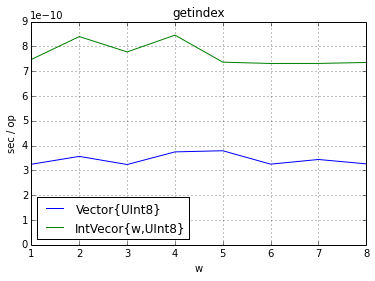

In [23]:
plot_benchmark("getindex", "UInt8")

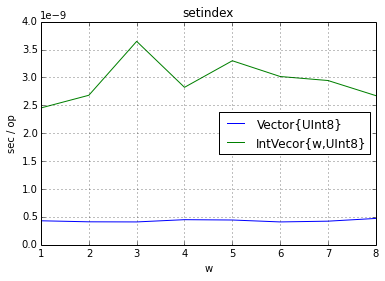

In [24]:
plot_benchmark("setindex", "UInt8")

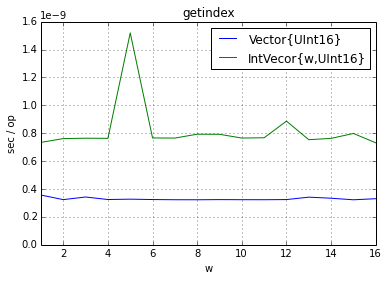

In [25]:
plot_benchmark("getindex", "UInt16")

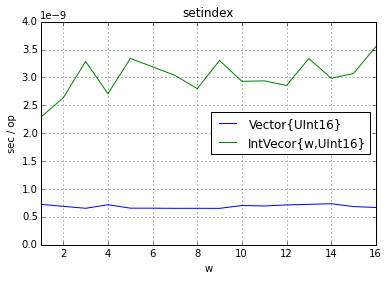

In [26]:
plot_benchmark("setindex", "UInt16")